## Fundamentals of Social Data Science

# Week 3 Day 3. Similarity and distance metrics 

Learning goals:
- Appreciate Jaccard Similarity between sets
- Consider how vectors are applied to matrices
- Consider how vectors can represent a direction in a space 
- Compare three corpora to get a sense of how similar vectors are betwee corpora:
    - Appreciate why cosine distance and not Euclidean distance is a useful measure of similarity.
- Examine the distance between words in a single corpus using cosine distance.
    - Do this using (as black box for now, MDS and t-SNE).


# Jaccard Similarity

The first distance metric to explore today is Jaccard similarity. Jaccard similarity is a measure of similarity between two sets. It is defined as the size of the intersection divided by the size of the union of the sets. The Jaccard similarity coefficient ranges from 0 to 1, where 0 indicates that the sets are disjoint and 1 indicates that the sets are identical.

The formula for Jaccard similarity is:

$$
J(A, B) = \frac{|A \cap B|}{|A \cup B|}
$$

where $A$ and $B$ are two sets, $|A \cap B|$ is the number of elements in the intersection of $A$ and $B$, and $|A \cup B|$ is the number of elements in the union of $A$ and $B$.

So if we have two subreddits, one will have a vocabulary with $A$ terms, the other will have a vocabulary with $B$ terms. Thus Jaccord is a measure of how many of these terms overlap. It is relatively easy to see this in Python. While there are specialist commands, it's also as simple as drafting the set operations: 

In [ ]:
# Define lists of fruits and vegetables
fruits = ["apple", "banana", "cherry", "date", "elderberry"]
vegetables = ["asparagus", "broccoli", "carrot", "date", "elderberry", "sprouts", "onions"]
edible_spheres = ["apple", "cherry", "date", "carrot", "sprouts", "onions"]

# Convert lists to sets
set_fruits = set(fruits)
set_vegetables = set(vegetables)
set_spheres = set(edible_spheres)

# Calculate Jaccard similarity for fruits and spheres
intersection_fruits_spheres = set_fruits.intersection(set_spheres)
union_fruits_spheres = set_fruits.union(set_spheres)
jaccard_similarity_fruits_spheres = len(intersection_fruits_spheres) / len(union_fruits_spheres)

# Calculate Jaccard similarity for vegetables and spheres
intersection_vegetables_spheres = set_vegetables.intersection(set_spheres)
union_vegetables_spheres = set_vegetables.union(set_spheres)
jaccard_similarity_vegetables_spheres = len(intersection_vegetables_spheres) / len(union_vegetables_spheres)

print(f"Intersection (Fruits & Vegetables): {intersection}")
print(f"Union (Fruits & Vegetables): {union}")
print(f"Jaccard Similarity (Fruits & Vegetables): {jaccard_similarity:.2f}")
print()

print(f"Intersection (Fruits & Spheres): {intersection_fruits_spheres}")
print(f"Union (Fruits & Spheres): {union_fruits_spheres}")
print(f"Jaccard Similarity (Fruits & Spheres): {jaccard_similarity_fruits_spheres:.2f}")
print()

print(f"Intersection (Vegetables & Spheres): {intersection_vegetables_spheres}")
print(f"Union (Vegetables & Spheres): {union_vegetables_spheres}")
print(f"Jaccard Similarity (Vegetables & Spheres): {jaccard_similarity_vegetables_spheres:.2f}")

Intersection (Fruits & Vegetables): {'elderberry', 'date'}
Union (Fruits & Vegetables): {'apple', 'broccoli', 'cherry', 'date', 'banana', 'asparagus', 'elderberry', 'carrot'}
Jaccard Similarity (Fruits & Vegetables): 0.25

Intersection (Fruits & Spheres): {'cherry', 'apple', 'date'}
Union (Fruits & Spheres): {'apple', 'cherry', 'date', 'banana', 'sprouts', 'elderberry', 'carrot', 'onions'}
Jaccard Similarity (Fruits & Spheres): 0.38

Intersection (Vegetables & Spheres): {'carrot', 'sprouts', 'onions', 'date'}
Union (Vegetables & Spheres): {'apple', 'broccoli', 'cherry', 'asparagus', 'date', 'sprouts', 'elderberry', 'carrot', 'onions'}
Jaccard Similarity (Vegetables & Spheres): 0.44


# Vector representations 

While Jaccard can tell us some sense of how much overlap there is in the presence or absence of terms, there is much more we can do when we think of terms as vectors. To appreciate this will involve a bit of a dive into linear algebra. Let's take this step by step starting with how linear algebea worked in our original TF-IDF scores. 

TF-IDF is a way to calculate "term frequencies" which will be per document per term and inverse document frequencies, which are one value per document. Thus, the term frequencies are a matrix. One score per term, per document. The inverse document frequencies are a vactor. One score per document. 

We saw the steps to do this in the last lecture and then saw how this is done in sciket-learn using a "Vectorizer". We can now step back from that and consider what a vectorizer (or vectoriser in British spelling, perhaps) is in fact doing: it is transforming text into vectors. 

A vector is like a one-dimensional matrix. We might think of it like a list. Indeed, lists look like vectors but looks can be decieving for a few reasons. Frist, vectors only include numbers where lists can be objects. An array is a data structure that may or may not restrict to numbers, but when we are treating it as a vector it would have numbers. 

The second reason is conceptual and I think 3blue1brown explains this much better than I can. If you have not watched "Essence of Linear Algebra", viewing videos 1 through 4 (total of 40 minutes) may help make the rest of this explanation much clearer than I can. See: https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab  

The conceptual reason is that vectors represent a transformation. Take a baseline and the vector represents some distance away from that baseline. It _transforms_ an input value according to the values in the vector. If we start from an origin (0,0,0) then the vector (1,.5,.25) means that we will go 1 unit in the first direction, one half in the second direction, and one quarter in the third direction. In a 3d Cube this is like going up one side all the way then going 2/3 of the way over and one third of the way back. The point will now end up somewhere inside the cube. If we add that vector again, then we will again go 1 unit up, again a half unit to the side, and then another half unit back. 


So in a way we can consider vectors as points in a space, but this is only because we treat the baseline as 0,0,0. It's useful to think that they are ways of moving points around and thus warping where the points are in the space. Although this might seem still very mathematical and abstract, here is a stylsed example of its usage and where we are going:
- Imagine a space with all the words in it. 
- Each word can be seen as a having a location in this space. Some words will be more near to each other and some words will be further apart. 
- By locating words that are similar we can discover similar concepts. For example the word crocodile might be close to the word alligator. (I know they are different species but they sure get talked about alot in the same places.) 
- But also, since words are vectors, we can think about how their distance transforms another word. For example, the vectors for health + vehicle might gets you somewhere where the closest word is ambulance.

Here's where it gets hard and where we often lose a lot of people, but I think this point is really important. "Space" in this sense is not really about space in the 3D world we live in space. It is the 'space of possibilities for this data'. And that space can have many dimensions. We have a hard time visualising this, but the hope is that with some explanations of vectors we can still understand how it works. 

We already saw this in fact, we just need to reconsider what we did with TF-IDF. The IDF vector had 12 elements in it. Each one of these was a scalar (i.e. single) value. And then it transformed each of the documents, one after the other. We can think of each document as its own vector in the 12-dimensional term-frequency space, where each word is its own dimension. The IDF vector then transformed each TF vector in some way when we multiply. It might make some values larger (if the scalar was above 1) and some values lower (if it was between 0 and 1). So when we say we are weighting the term frequency by the inverse document frequency, we can also mean we are moving our values around in the term space to account for how noteworthy the terms are. 

In this sense, linear algebra is like mapping, but not for coordinates on the surface of the earth. It is for coordinates in all kinds of spaces where we can still have an understanding of what is near and what is far, whether or not we can visualise it directly. 

That being said, because we cannot usually visualise all these dimensions we tend to start with things in two dimensions and work up from there by analogy. So imagine we are only working with two terms instead of all the words. So we calculate our TF-IDF scores for all the words like we did, but we are only interested in the words: "immigrant" and "migrant". So instead of looking to see what are the top words in this corpus, we instead just take the scores for these two words in this corpus. So for the Reddit exercise, imagine we three subreddits. We will then have three vectors in the 2-dimensional migrant-immigrant "term-space". Thus we could plot all three of them, but rather than as points, imagine them as distance travelled from the origin. 

In Python we will use an array data structure to represent the vector, but we could use a list or a tuple. The point is it is an ordered collection of numbers. So we will have a list of three vectors, in my case, for `unitedkingdom`, `uknews`, and `ukpolitics`. Now these vectors come from different data, since they came from the relative distribution of words in each of the subreddits. So, this is not quite an apples to apples comparison since the vocabularies were not the same. With enough data the vocabs would likely converge but that's not even the most pressing concern. Here we aren't interested in whether `uknews` and `ukpolitics` use the same words. We are interested in where the words 'migrant' and 'immigrant' are located relative to each other. 

Let's focus on the intuitive understanding of this from the visual diagram. Then we will circle back to the code to look at how linear algebra plays a role here through the calculations of distance using these lines of code: 

~~~
dist = np.linalg.norm(vec1 - vec2)
~~~

and 

~~~
cos_sim = np.dot(vec1, vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))
angle = np.degrees(np.arccos(cos_sim))
~~~

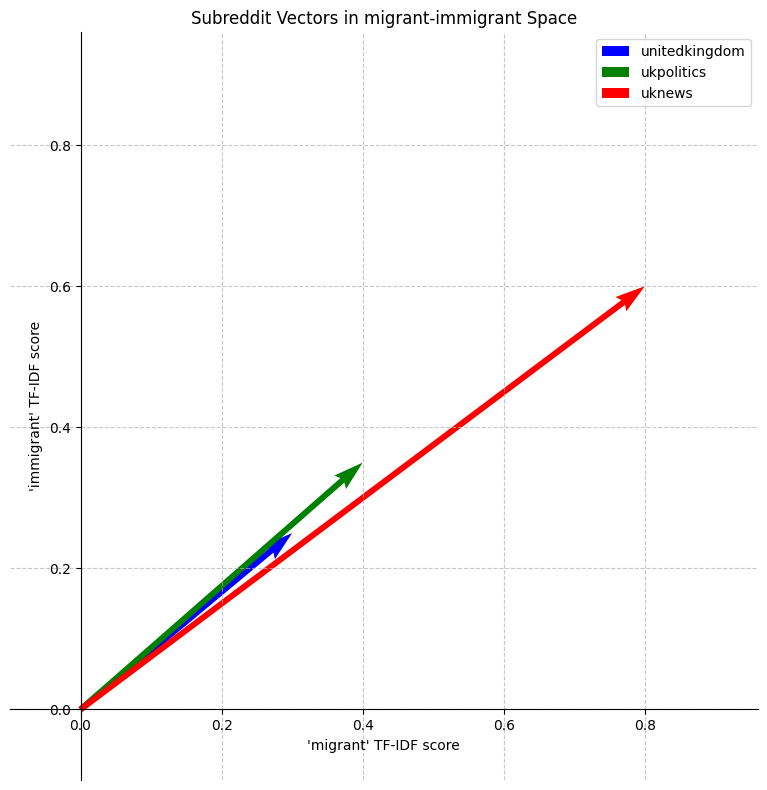

Distance between ukpolitics and unitedkingdom: 0.14
Distance between uknews and unitedkingdom: 0.61
Distance between uknews and ukpolitics: 0.47

Angles between subreddit vectors:
ukpolitics vs unitedkingdom: 1.4°
uknews vs unitedkingdom: 2.9°
uknews vs ukpolitics: 4.3°


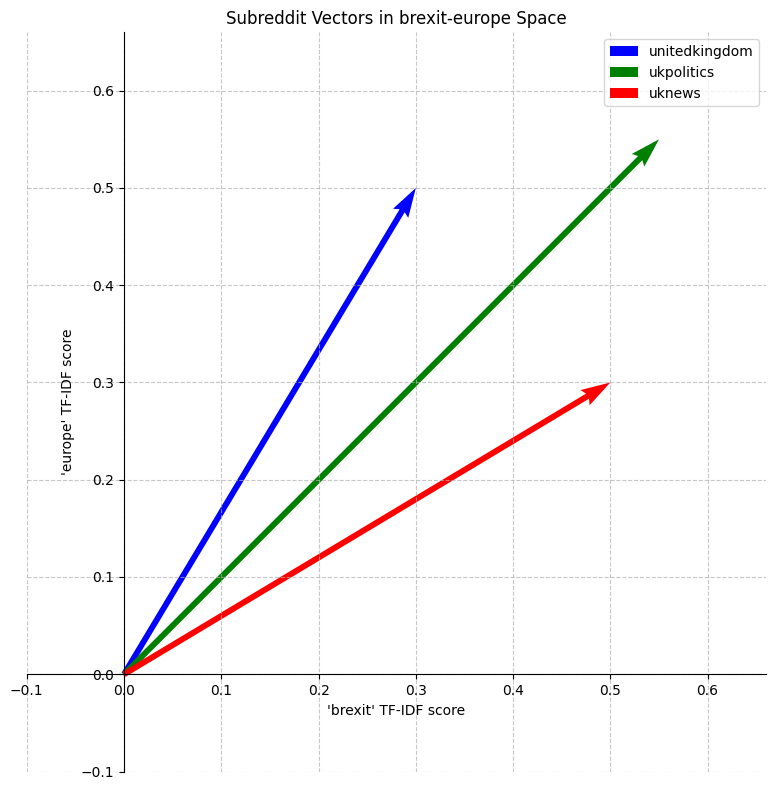

Distance between ukpolitics and unitedkingdom: 0.25
Distance between uknews and unitedkingdom: 0.28
Distance between uknews and ukpolitics: 0.25

Angles between subreddit vectors:
ukpolitics vs unitedkingdom: 14.0°
uknews vs unitedkingdom: 28.1°
uknews vs ukpolitics: 14.0°


In [49]:
import numpy as np
import matplotlib.pyplot as plt

def plot_subreddit_term_space(vectors, term1, term2, title=None):
    """
    Plot subreddit vectors in a 2D term space.
    
    Parameters:
    - vectors: dict with subreddit names as keys and np.arrays as values
    - term1: string name of first term (x-axis)
    - term2: string name of second term (y-axis)
    - title: optional custom title
    """
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    
    # Plot vectors from origin
    colors = ['blue', 'green', 'red']
    for (name, vec), color in zip(vectors.items(), colors):
        plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
                  color=color, label=name, width=0.008)
    
    # Style the plot
    plt.grid(True, linestyle='--', alpha=0.7)
    # Fix: stack all vectors and find max value
    all_values = np.concatenate([v for v in vectors.values()])
    max_val = np.max(all_values) * 1.2
    plt.xlim(-0.1, max_val)
    plt.ylim(-0.1, max_val)
    ax.set_aspect('equal')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Labels
    plt.xlabel(f"'{term1}' TF-IDF score")
    plt.ylabel(f"'{term2}' TF-IDF score")
    plt.title(title or f"Subreddit Vectors in {term1}-{term2} Space")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
def report_distances(vectors):
    """
    Report the distances between subreddit vectors.
    
    Parameters:
    - vectors: dict with subreddit names as keys and np.arrays as values
    """
    for name1, vec1 in vectors.items():
        for name2, vec2 in vectors.items():
            if name1 < name2:
                dist = np.linalg.norm(vec1 - vec2)
                print(f"Distance between {name1} and {name2}: {dist:.2f}")
                
    # Print angles between vectors
    print("\nAngles between subreddit vectors:")
    for name1, vec1 in vectors.items():
        for name2, vec2 in vectors.items():
            if name1 < name2:  # avoid duplicate comparisons
                cos_sim = np.dot(vec1, vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))
                angle = np.degrees(np.arccos(cos_sim))
                print(f"{name1} vs {name2}: {angle:.1f}°")

# First stylsed example: migrant-immigrant space
# These terms are often used similarly across subreddits
migrant_immigrant_vectors = {
    'unitedkingdom': np.array([0.3, 0.25]),    # moderate usage of both terms
    'ukpolitics': np.array([0.4, 0.35]),       # slightly higher usage of both
    'uknews': np.array([0.8, 0.6])             # much higher usage of both terms
}

plot_subreddit_term_space(migrant_immigrant_vectors, 'migrant', 'immigrant')

report_distances(migrant_immigrant_vectors)


# Second example: brexit-europe space
# These terms might show more divergence in usage patterns
brexit_europe_vectors = {
    'unitedkingdom': np.array([0.3, 0.5]),     # more europe than brexit
    'ukpolitics': np.array([0.55, 0.55]),        # both similar, but higher usage
    'uknews': np.array([0.5, 0.3])             # more brexit than europe
}

plot_subreddit_term_space(brexit_europe_vectors, 'brexit', 'europe')
report_distances(brexit_europe_vectors)


In the first stylised example of migrants vs immigrants, we see a few patterns. uknews is slightly further to migrants than immagrants relative to the other two subreddits, but its really not much. All three tend to extend out from the origin in effectively the same direction. But uknews extends out further which would imply that while these two words mean sort of the same thing in each corpus _relative to each other_, the words are much more noteworthy in UK news. This would suggest that we would see more stories focused on immigrants and migrants than in the other two subreddits, but when we see these stories we are about as likely to see migrants and immigrants in the text.   

In the second example the three vectors diverge somewhat. So mentions of Europe are more noteworthy than Brexit in unitedkingdom. It's about equal in ukpolitics while in uknews Brexit is more noteworthy than Europe.  

Now it's worth pausing to check in on our object of inquiry and units of analysis for this technique because we might get the interpretation confused. We are not saying that when people mention Brexit they also mention Europe...in the same stories. Rather, these points represent TF-IDF vectors of how noteworthy each term is in that corpus. So if both terms are equally noteworthy they will show up on the diagonal (.1,.1) or (.5, .5). They do not have to be equally noteworthy. All the papers might mention Brexit more than Europe. What we are showing is whether the distance between these terms is itself interesting. 

This leads us to examine distance in here in two ways: 
- Euclidean distance (`dist = np.linalg.norm(vec1 - vec2)`)
- Cosine distance (`cos_sim = np.dot(vec1, vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))`). Though strictly speaking this is the cosine similarity score. Cosine distance is 1 - `cos_sim`. 

The Euclidean distance is like drawing a straight line between the points. How far is one from another. So in the migrant example we can see that uknews is almost twice as far away from the origin as the other two. But while it is twice as far away, it is twice as far away _in the same direction_. This means that in 'immigrant-migrant' space these two terms are _relatively speaking_ similarly noteworthy across the subs. 

Cosine distance refers to the angle rather than the direction. When things diverge in cosine distance that means that these terms are of different noteworthiness in the different corpora. Notice that in the bottom example, all three are about the same distance from each other but the angle is very different. Thus we can understand unitedkingdom as being semantically in the middle of the other two even though it is furthest from the origin. While the subreddit's distance from each other is about equal that does not mean that they think of these words equally. If you go to one you're going to get more Brexit talk and if you go to the other you'll get more Europe talk (likely without as much reference to Brexit). 

# Using a cosine distance matrix

Since we can calculate the cosine distance between any two terms, we can then produce a distance matrix much like we could have done with physical distances. Only this time they would be 'transitive'. That is the distance from A to B + the distance from B to C will necessarily not be the distance from A to C. This is a bit perplexing but I will let you explore that on your own. Importantly, however, it means that there is lots of information contained in the distance matrix that cannot be easily visiualised directly. We cannot just plot all these points on an XY grid as is and make sense of them. 

This is related to a topic in statistics referred to as 'the curse of dimensionality'. In this case, it means that while we have all the information in a higher dimensional space we cannot fully represent this information in a simpler space like 2D. 

For this reason we have a number of tools to help us transform these distances into meaningful approximations. Two such approaches are MDS or "Multidimensional Scaling" and t-SNE or "t-distributed Stochastic Neighbor Embedding". Simply stated, multidimensional scaling tries to find two new vectors such that each term will get a value in each vector. One will be the vector we plot on the X axis and one will be the vector we plot on the Y axis.  t-SNE does a similar thing but through a more complex algorithm. It is generally more useful when we have a very large number of terms to present. 

For the illustration of these two concepts it really pays to use real data. So for that reason, I turn from here to the lab. In the lab, we see a dramatic refactoring of the repository since the last lecture. While I am tempted to drill into MDS and t-SNE from a conceptual point of view, in the interests of time and brevity I will defer to the lab. There you will see how I can collect reddit posts similar to last time and again report some TF-IDF values. 

To see where the action happens, have a look at `analysis.py`. Within the `plot_word_similarities` method is the following code: 

~~~python
    # Get vectors for top terms
    term_vectors = tfidf_matrix.T[top_indices].toarray()
    top_terms = feature_names[top_indices]
    
    # Calculate similarities and distances
    similarities = cosine_similarity(term_vectors)
    distances = 1 - similarities
    
    # Use MDS for 2D projection
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    coords = mds.fit_transform(distances)
~~~

This code first gets the TFIDF matrix. Then this is used to create a matrix of cosine_similarity with the term vectors (so its shape will be term\*term). Then we create an MDS model with 2 components. These will be plotted as our X and Y values. coors are the two components from the mds using the cosine distance. 

This is pretty similar to what happens in the t-SNE approach as well: 

~~~python
    # Get vectors for all terms
    term_vectors = tfidf_matrix.T.toarray()
        
    # Calculate t-SNE for all terms
    tsne = TSNE(n_components=2, 
                perplexity=min(30, len(feature_names)/4), 
                random_state=42)
    coords = tsne.fit_transform(term_vectors)
~~~

In both cases, the TFIDF matrix is transformed through the algorithm and we get 2 components which we can then plot. t-SNE is not deterministic but is instead sensitive to randomness as it tries to fit a solution. This is why it uses the `random_state` parameter (which means we will get the same results every time we use the same random_state). While it is a bit low-level, you can alter the state and use the same data to see a slightly different outcome. It should make only a tiny difference. 

In the lab you can step through the cells to see how we apply these values first to a Jaccard Similarity and then MDS and t-SNE to our data. You might be wondering why we did this with the TF-IDF vectors and not simply the counts of words per document? The math behind this does get tricky, but the short version is that since documents can be different sizes with therefore different numbers of words, TF-IDF does a good job of reweighting the words so that their noteworthiness becomes a better measure of their appearance in a document than the raw count scores.

In the lab, run the notebook on your own chosen subs. Explore the MDS and t-SNE results and see if the results makes patterns clear to you. We will be looking here at these subs separately but in the next lecture we will be combining them in some ways. In particular we will see if we can tell these subs apart using Naive Bayes Clustering and k-means analysis. We will also introduce some classic metrics for classification: precision, recall, specificity, sensitivity, and the F1 score.